In [1]:
import requests

with open("Training.zip","wb") as f:
  f.write(requests.get("https://github.com/sakshibutala/CNN_AlphabetRecognition/blob/master/Training.zip?raw=true").content)
with open("Testing.zip","wb") as f:
  f.write(requests.get("https://github.com/sakshibutala/CNN_AlphabetRecognition/blob/master/Testing.zip?raw=true").content)

In [2]:
!unzip "Testing.zip"
!unzip "Training.zip"

Archive:  Testing.zip
  inflating: Testing/r/23.png        
  inflating: Testing/l/26.png        
  inflating: Testing/n/28.png        
  inflating: Testing/r/24.png        
  inflating: Testing/z/29.png        
  inflating: Testing/r/26.png        
  inflating: Testing/l/22.png        
  inflating: Testing/l/25.png        
  inflating: Testing/r/29.png        
  inflating: Testing/z/27.png        
  inflating: Testing/l/28.png        
  inflating: Testing/r/28.png        
  inflating: Testing/n/29.png        
  inflating: Testing/r/25.png        
  inflating: Testing/s/29.png        
  inflating: Testing/l/23.png        
  inflating: Testing/l/21.png        
  inflating: Testing/e/25.png        
  inflating: Testing/l/30.png        
  inflating: Testing/l/29.png        
  inflating: Testing/l/24.png        
  inflating: Testing/y/27.png        
  inflating: Testing/f/22.png        
  inflating: Testing/a/21.png        
  inflating: Testing/r/27.png        
  inflating: Testing/r/30.pn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = 'Training',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

test_generator = test_datagen.flow_from_directory(
    directory = 'Testing',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

Found 501 images belonging to 26 classes.
Found 260 images belonging to 26 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               147584    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3

In [6]:
model.fit_generator(train_generator,
                         steps_per_epoch = 16,
                         epochs = 25,
                         validation_data = test_generator,
                         validation_steps = 16)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
16/16 [==============================] - 2s 91ms/step - loss: 3.1242 - accuracy: 0.1677 - val_loss: 2.9117 - val_accuracy: 0.2538
Epoch 2/25
16/16 [==============================] - 1s 60ms/step - loss: 2.2547 - accuracy: 0.4431
Epoch 3/25
16/16 [==============================] - 1s 58ms/step - loss: 1.0346 - accuracy: 0.6806
Epoch 4/25
16/16 [==============================] - 1s 59ms/step - loss: 0.6385 - accuracy: 0.7924
Epoch 5/25
16/16 [==============================] - 1s 58ms/step - loss: 0.4664 - accuracy: 0.8343
Epoch 6/25
16/16 [==============================] - 1s 59ms/step - loss: 0.4530 - accuracy: 0.8263
Epoch 7/25
16/16 [==============================] - 1s 58ms/step - loss: 0.3260 - accuracy: 0.8782
Epoch 8/25
16/16 [==============================] - 1s 58ms/step - loss: 0.3497 - accuracy: 0.8723
Epoch 9/25
16/16 [==============================] - 1s 57ms/step - loss: 0.2807 - accuracy: 0.8902
Epoch 10/25
16/16 [==============================] - 1s 59ms/step -

Predicted Alphabet is: e


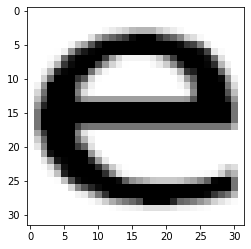

In [8]:
from string import ascii_lowercase
from collections import OrderedDict

od = OrderedDict((idx, ch) for idx, ch in enumerate(ascii_lowercase, 1))

def get_result(result):
    for ind, i in enumerate(result[0]):
      if result[0][ind] == 1:
        return od[ind]

filename = r'Testing/e/24.png'
test_image = image.load_img(filename, target_size = (32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result = get_result(result)
print ('Predicted Alphabet is: {}'.format(result))